<a href="https://colab.research.google.com/github/IgorJoaquimn/2023-Ising-Model/blob/main/ising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numba import jit
import multiprocessing
from multiprocessing.pool import ThreadPool
from functools import partial
from matplotlib.pyplot import figure
from math import floor,sqrt

figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Alunos:
* Giovana Assis da Matta Machado
* Igor Joaquim da Silva Costa


O modelo de Ising é um modelo físico que descreve um sistema de partículas com dois estados possíveis, como spins em um material magnético. O algoritmo de Metropolis é um método de simulação de Monte Carlo que pode ser usado para estudar o comportamento deste modelo.

Nesse trabalho, foram realizados diversos testes sobre o comportamento do modelo de Ising usando o algoritmo de Metropolis, visando investigar as propriedades magnéticas e termodinâmicas desse sistema. Foram exploradas diferentes configurações iniciais de spins, variando-se a temperatura e o tamanho do reticulado.

Os resultados revelaram importantes informações sobre a transição de fase do modelo de Ising, elucidando como os spins se organizam em estruturas magnéticas ordenadas ou desordenadas, dependendo das condições termodinâmicas. Além disso, a análise das grandezas termodinâmicas, como a magnetização e o calor específico, proporcionou uma compreensão mais profunda dos fenômenos críticos e das propriedades do sistema, contribuindo para a ampliação do conhecimento em física estatística e sistemas complexos.

## Parte 1

Definições de funções auxiliares

In [ ]:
def vizinhos(N):
 #Define a tabela de vizinhos
 L=int(np.sqrt(N))
 viz = np.zeros((N,4),dtype=np.int16)
 for k in range(N):
    viz[k,0]=k+1
    if (k+1) % L == 0: viz[k,0] = k+1-L
    viz[k,1] = k+L
    if k > (N-L-1): viz[k,1] = k+L-N
    viz[k,2] = k-1
    if (k % L == 0): viz[k,2] = k+L-1
    viz[k,3] = k-L
    if k < L: viz[k,3] = k+N-L
 return viz

In [ ]:
def energia(s,viz):
 #Calcula a energia da configuração representada no array s
 N=len(s)
 ener = 0
 for i in range(N):
    h = s[viz[i,0]]+s[viz[i,1]] # soma do valor dos spins a direita e acima
    ener += s[i]*h
 return ener * -1

In [ ]:
def expos(beta):
   ex = np.zeros(5,dtype=np.float32)
   ex[0]=np.exp(8.0*beta)
   ex[1]=np.exp(4.0*beta)
   ex[2]=1.0
   ex[3]=np.exp(-4.0*beta)
   ex[4]=np.exp(-8.0*beta)
   return ex

In [ ]:
def get_delta_energy(s,i,exps,viz):
  h  = s[viz[i,0]]+s[viz[i,1]]+s[viz[i,2]]+s[viz[i,3]]
  de = int(s[i]*h*0.5+2)
  return exps[de]


In [ ]:
@jit(nopython=True)
def get_partial_energy(s,i,viz):
    h = s[viz[i,0]]+s[viz[i,1]]+s[viz[i,2]]+s[viz[i,3]]
    return -2*h*s[i]

In [ ]:
def get_initial_conf(N):
    x = np.random.uniform(0,1,N)
    f = np.vectorize(lambda x: 1 if x < 0.5 else -1)
    return f(x)

In [ ]:
def one_monte_carlo_repo(s,viz,energia_inicial,exps):
    r = np.random.uniform(0,1,len(s))
    for i in range(len(s)):
      P = get_delta_energy(s,i,exps,viz)
      if(r[i] <= P):
        s[i] *= -1

    return energia(s,viz),sum(s)

In [ ]:
def task1(NSIM=1000, temperatura = 3.0, L = 24):
  beta = 1/temperatura
  N = L**2
  viz = vizinhos(N)
  s   = get_initial_conf(N)
  energy_df     = np.zeros(NSIM)
  mag_df        = np.zeros(NSIM)
  mag_df[0]     = sum(s)
  energy_df[0]  = energia(s,viz)
  exps = expos(beta)
  for i in range(1,NSIM):
    energy_df[i],mag_df[i] = one_monte_carlo_repo(s,viz,energy_df[0],exps)
  return energy_df,mag_df

In [ ]:
conf_iniciais = 20
NSIM = 1000


values = np.repeat(NSIM,conf_iniciais)
energy = np.zeros((conf_iniciais,NSIM))
magnet = np.zeros((conf_iniciais,NSIM))

for i in range(conf_iniciais):
  energy_df,mag_df = task1(NSIM)
  energy[i]  = energy_df
  magnet[i]   = mag_df

### Avaliação e Visualização dos passos de Monte Carlo

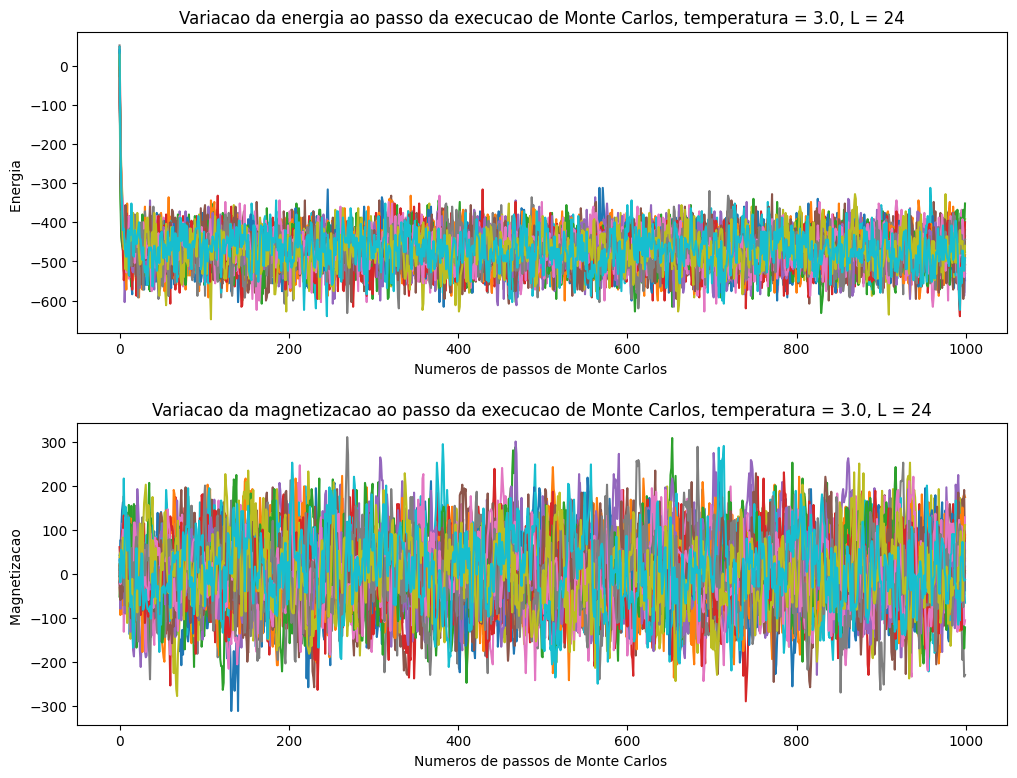

In [ ]:
fig = plt.figure(figsize=(12, 9))
fig.subplots_adjust(hspace=0.3)

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
ax1.set_title("Variacao da energia ao passo da execucao de Monte Carlos, temperatura = 3.0, L = 24")
ax1.set_xlabel("Numeros de passos de Monte Carlos ")
ax1.set_ylabel("Energia ")
ax2.set_title(f"Variacao da magnetizacao ao passo da execucao de Monte Carlos, temperatura = 3.0, L = 24")
ax2.set_xlabel("Numeros de passos de Monte Carlos ")
ax2.set_ylabel("Magnetizacao ")


for i in range(conf_iniciais):
  sns.lineplot(x=list(range(NSIM)), y = energy[i],ax=ax1)
  sns.lineplot(x=list(range(NSIM)), y = magnet[i],ax=ax2)
plt.show()

In [ ]:
for i in range(conf_iniciais):
  energy_df,mag_df = task1(NSIM, 0.4, 100)
  energy[i]  = energy_df
  magnet[i]   = mag_df

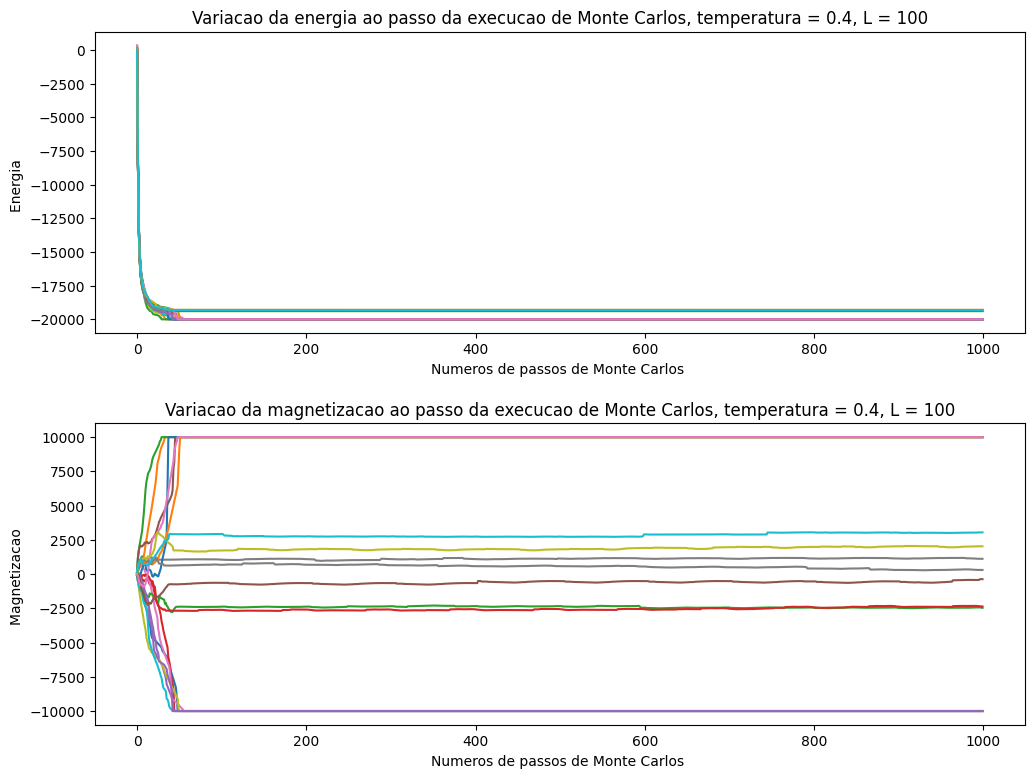

In [ ]:
fig = plt.figure(figsize=(12, 9))
fig.subplots_adjust(hspace=0.3)

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
ax1.set_title("Variacao da energia ao passo da execucao de Monte Carlos, temperatura = 0.4, L = 100")
ax1.set_xlabel("Numeros de passos de Monte Carlos ")
ax1.set_ylabel("Energia ")
ax2.set_title("Variacao da magnetizacao ao passo da execucao de Monte Carlos, temperatura = 0.4, L = 100")
ax2.set_xlabel("Numeros de passos de Monte Carlos ")
ax2.set_ylabel("Magnetizacao ")

for i in range(conf_iniciais):
  sns.lineplot(x=list(range(NSIM)), y = energy[i],ax=ax1)
  sns.lineplot(x=list(range(NSIM)), y = magnet[i],ax=ax2)
plt.show()

In [ ]:
for i in range(conf_iniciais):
  energy_df,mag_df = task1(NSIM, 1.5, 32)
  energy[i]  = energy_df
  magnet[i]   = mag_df

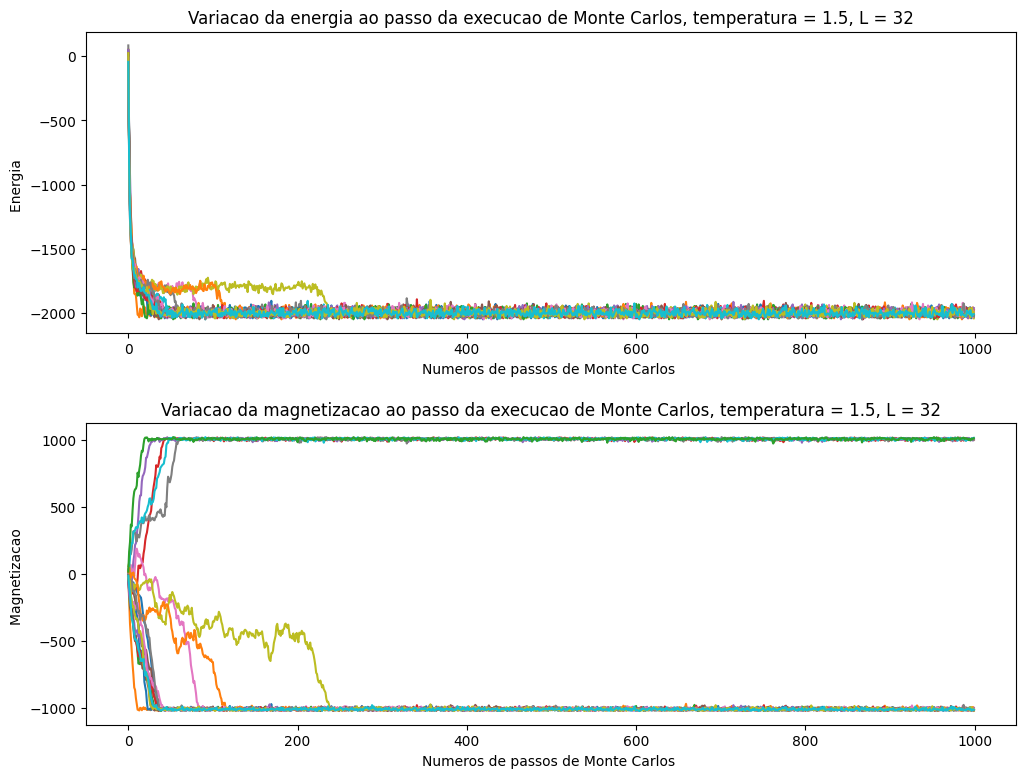

In [ ]:
fig = plt.figure(figsize=(12, 9))
fig.subplots_adjust(hspace=0.3)

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
ax1.set_title("Variacao da energia ao passo da execucao de Monte Carlos, temperatura = 1.5, L = 32")
ax1.set_xlabel("Numeros de passos de Monte Carlos ")
ax1.set_ylabel("Energia ")
ax2.set_title("Variacao da magnetizacao ao passo da execucao de Monte Carlos, temperatura = 1.5, L = 32")
ax2.set_xlabel("Numeros de passos de Monte Carlos ")
ax2.set_ylabel("Magnetizacao ")

for i in range(conf_iniciais):
  sns.lineplot(x=list(range(NSIM)), y = energy[i],ax=ax1)
  sns.lineplot(x=list(range(NSIM)), y = magnet[i],ax=ax2)
plt.show()

### Comportamento do modelo ao variar Temperatura e Tamanho dos modelos

Text(0.5, 0.98, 'Variacao da energia alterando o tamanho do sistema e a temperatura ao passo da execucao de Monte Carlos')

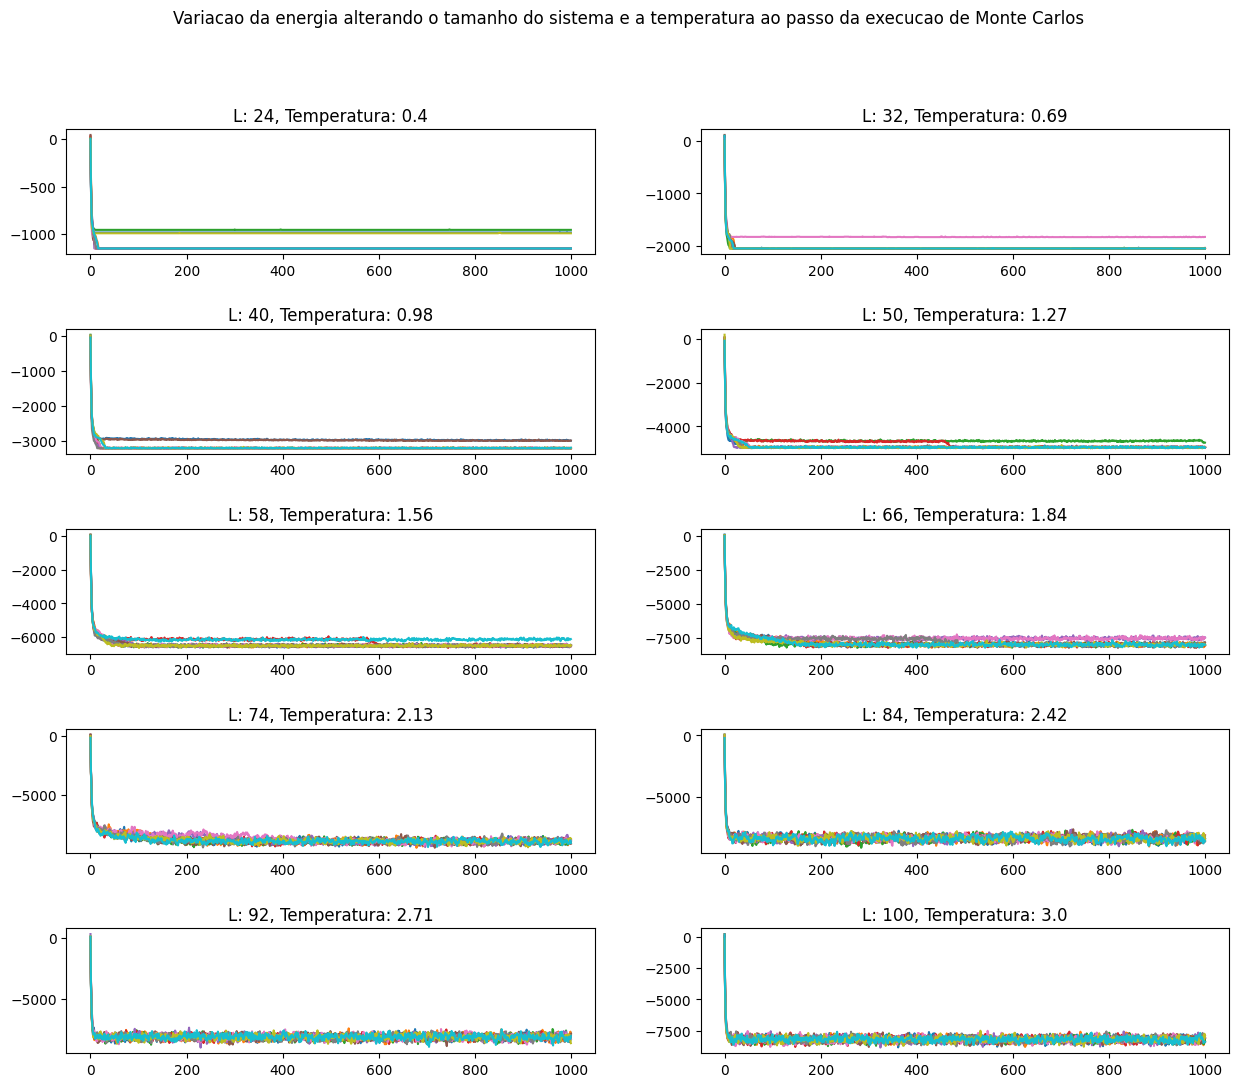

In [ ]:
fig = plt.figure(figsize=(15, 12))
fig.subplots_adjust(hspace=0.6)


axs = [fig.add_subplot(5, 2, i + 1) for i in range(10)]

conf_iniciais = 10
NSIM = 1000

tam = np.linspace(24, 100, 10, dtype=int)
tam = tam + (tam % 2)
temp = np.linspace(0.4,3.0,10)
temp = [round(valor, 2) for valor in temp]
term = []

energy = np.zeros((conf_iniciais,NSIM))
magnet = np.zeros((conf_iniciais,NSIM))

for i in range (10):
  for j in range(conf_iniciais):
    energ,mag = task1(NSIM, temperatura = temp[i], L = tam[i])
    energy[j] = energ
    magnet[j] = mag
  for j in range(conf_iniciais):
    sns.lineplot(x=list(range(NSIM)), y = energy[j], ax=axs[i])
    axs[i].set_title(f"L: {tam[i]}, Temperatura: {temp[i]}")

fig.suptitle("Variacao da energia alterando o tamanho do sistema e a temperatura ao passo da execucao de Monte Carlos")


### Tabela de Termalização

In [ ]:
temp = ['0.4', '0.69', '0.98', '1.27', '1.56', '1.84', '2.13', '2.42', '2.71', '3.0']
tam = ['24', '32', '40', '50', '58', '66', '74', '84', '92', '100']
termalização = ['não foi possivel termalizar','não foi possivel termalizar','não foi possivel termalizar','1000','não foi possivel termalizar','1200','300','200','200','200']
dados = pd.DataFrame({'Temperatura': temp, 'L': tam, 'Termalização':termalização})
dados

,Temperatura,L,Termalização
0,0.4,24,não foi possivel termalizar
1,0.69,32,não foi possivel termalizar
2,0.98,40,não foi possivel termalizar
3,1.27,50,1000
4,1.56,58,não foi possivel termalizar
5,1.84,66,1200
6,2.13,74,300
7,2.42,84,200
8,2.71,92,200
9,3.0,100,200


## Parte 2

In [ ]:
def get_props_each_box(energy,magnet,m,N_BOX):
  E = np.zeros(N_BOX)
  M = np.zeros(N_BOX)
  E2 = np.zeros(N_BOX)
  M2 = np.zeros(N_BOX)
  # Split the vector into M blocks and calculate the average of each block
  for i in range(N_BOX):
      start = i * m
      end = (i + 1) * m
      block_e = energy[start:end]
      block_m = magnet[start:end]
      E[i]    = np.mean(block_e)
      E2[i]   = np.mean(block_e**2)
      M[i]    = np.mean(block_m)
      M2[i]   = np.mean(block_m**2)
  return E,M,E2,M2

In [ ]:
def get_termo_props(temperatura = 0.4, L = 24,N_MC_REPS = 800, N_BOX=10,  N_TERMINATION = 500):
  energy,magnet = task1(N_MC_REPS,temperatura,L)
  energy = energy[N_TERMINATION:]
  magnet = magnet[N_TERMINATION:]
  m = (N_MC_REPS - N_TERMINATION) // N_BOX
  E,M,E2,M2 = get_props_each_box(energy,magnet,m,N_BOX)

  N = L**2
  beta = 1/temperatura

  Cv      = np.array([((beta**2)/N) * (E2[i]-E[i])   for i in range(N_BOX)])
  Cv_avg  = np.mean(Cv)
  err     = sqrt(np.sum((Cv_avg - Cv)**2)/(N*(N-1)))
  susceptibilidade = np.array([((beta**2)/N) * (M2[i]-M[i])   for i in range(N_BOX)])
  return np.mean(E),np.mean(M),np.mean(Cv),np.mean(susceptibilidade),err

In [ ]:
steps = 10
temps  = np.linspace(0.4,3,steps)

energy = np.zeros(steps)
magnet = np.zeros(steps)
calorE = np.zeros(steps)
suscep = np.zeros(steps)
erroEs = np.zeros(steps)
L = 24
for i,temp in enumerate(temps):
  print(temp)
  energy[i],magnet[i],calorE[i],suscep[i],erroEs[i] = get_termo_props(temperatura = temp, L = L)

### Descreva o comportamento observado para as principais grandezas termodinâmicas

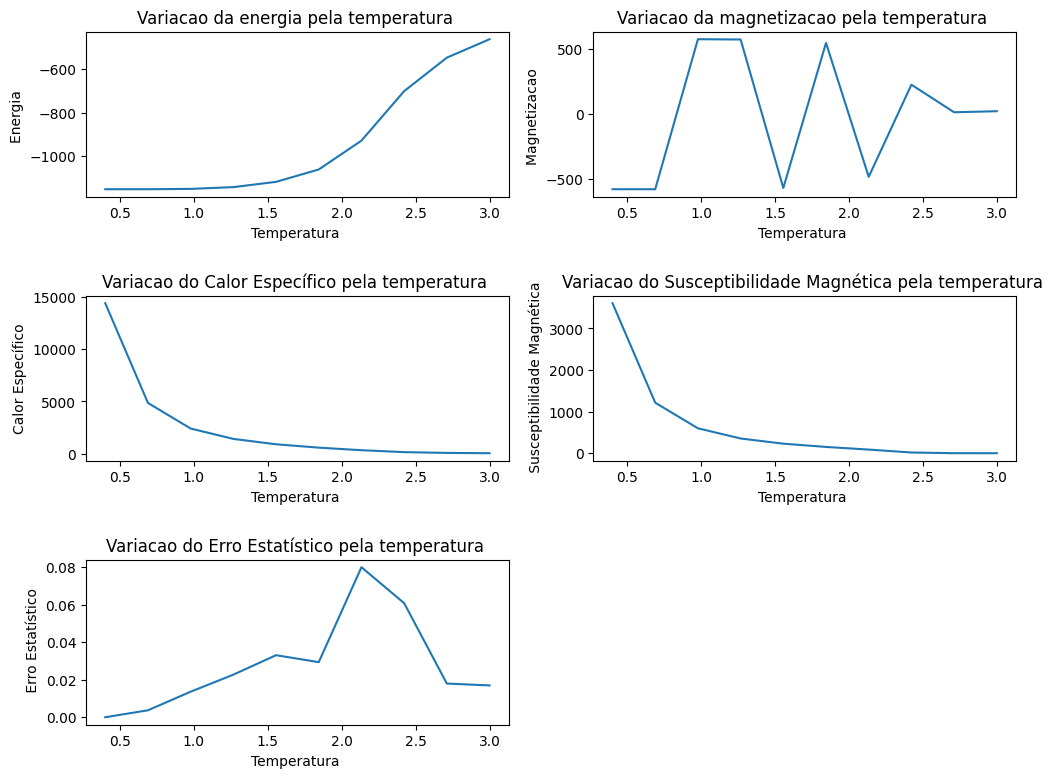

In [ ]:
fig = plt.figure(figsize=(12, 9))
fig.subplots_adjust(hspace=0.6)

ax1 = fig.add_subplot(3, 2, 1)
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 3)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 5)

ax1.set_title("Variacao da energia pela temperatura ")
ax1.set_xlabel("Temperatura ")
ax1.set_ylabel("Energia ")

ax2.set_title("Variacao da magnetizacao pela temperatura ")
ax2.set_xlabel("Temperatura ")
ax2.set_ylabel("Magnetizacao ")

ax3.set_title("Variacao do Calor Específico pela temperatura ")
ax3.set_xlabel("Temperatura ")
ax3.set_ylabel("Calor Específico")

ax4.set_title("Variacao do Susceptibilidade Magnética pela temperatura ")
ax4.set_xlabel("Temperatura ")
ax4.set_ylabel(" Susceptibilidade Magnética")

ax5.set_title("Variacao do Erro Estatístico pela temperatura ")
ax5.set_xlabel("Temperatura ")
ax5.set_ylabel(" Erro Estatístico")

sns.lineplot(x=temps, y = energy,ax=ax1)
sns.lineplot(x=temps, y = magnet,ax=ax2)
sns.lineplot(x=temps, y = calorE,ax=ax3)
sns.lineplot(x=temps, y = suscep,ax=ax4)
sns.lineplot(x=temps, y = erroEs,ax=ax5)

plt.show()


Energia: A partir de experimentos anteriores, foi evidenciado que, à medida que a temperatura aumenta, a variação de energia se torna mais significativa, especialmente nas proximidades do ponto de termalização. Este fenômeno foi corroborado pelo experimento representado nos gráficos acima. Com efeito, podemos inferir que, com o aumento da temperatura, os spins se tornam mais propensos a alterar sua orientação.

Calor específico e suscetibilidade magnética: A análise dos gráficos acima revela uma diminuição nessas duas propriedades. Essa tendência pode ser explicada pelo aumento da probabilidade de variação na orientação dos spins. À medida que os spins se tornam mais desordenados, o material perde sua capacidade de magnetização e sua energia interna diminui. Isso resulta na redução do calor específico e da suscetibilidade magnética.

Magnetização: É evidente a presença de diversos picos e vales na curva, os quais podem ser atribuídos às transições de fase no modelo de Ising.

Erro estatístico: Pode-se observar um pico no erro estatístico calculado próximo às temperaturas críticas, possivelmente indicando uma transição de fase.



### Quais critérios você utilizou para escolher os valores dos parâmetros descritos acima?

  * Tempo de computação
  * Erro estatísitco

### Ao variar o tamanho do sistema, como as curvas destas grandezas em função da temperatura se modifica?

24
44
62
82
100


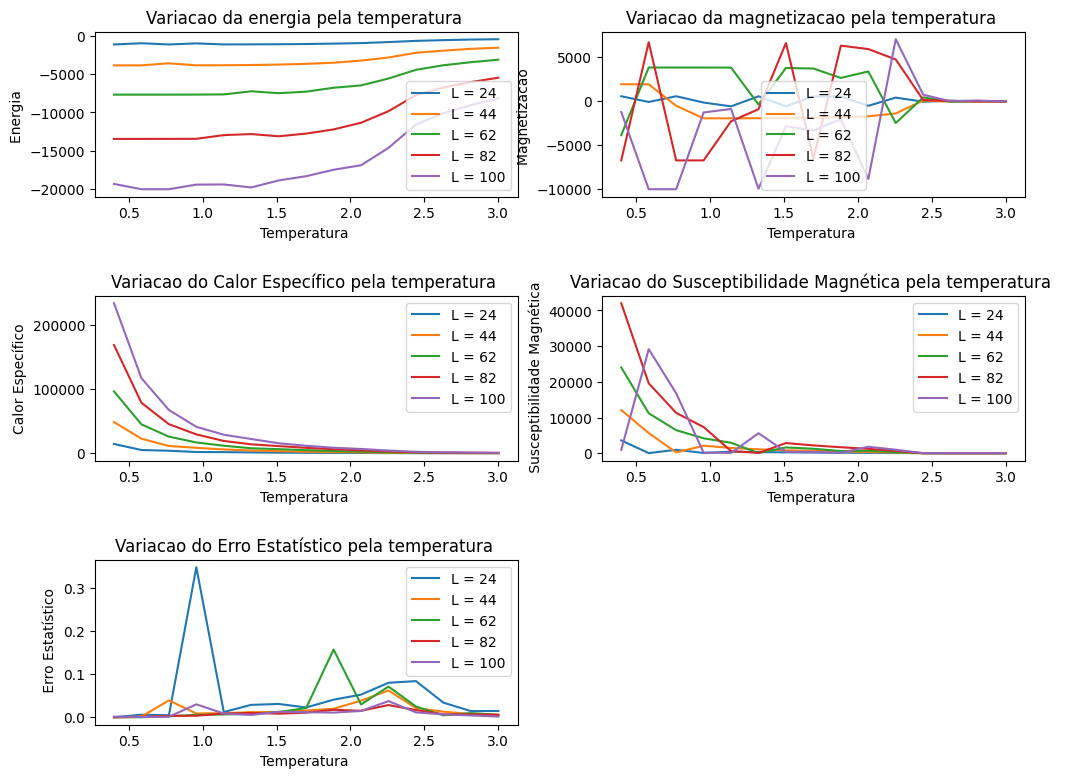

In [ ]:
fig = plt.figure(figsize=(12, 9))
fig.subplots_adjust(hspace=0.6)

ax1 = fig.add_subplot(3, 2, 1)
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 3)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 5)

ax1.set_title("Variacao da energia pela temperatura ")
ax1.set_xlabel("Temperatura ")
ax1.set_ylabel("Energia ")

ax2.set_title("Variacao da magnetizacao pela temperatura ")
ax2.set_xlabel("Temperatura ")
ax2.set_ylabel("Magnetizacao ")

ax3.set_title("Variacao do Calor Específico pela temperatura ")
ax3.set_xlabel("Temperatura ")
ax3.set_ylabel("Calor Específico")

ax4.set_title("Variacao do Susceptibilidade Magnética pela temperatura ")
ax4.set_xlabel("Temperatura ")
ax4.set_ylabel(" Susceptibilidade Magnética")

ax5.set_title("Variacao do Erro Estatístico pela temperatura ")
ax5.set_xlabel("Temperatura ")
ax5.set_ylabel(" Erro Estatístico")

steps = 15
temps  = np.linspace(0.4,3,steps)

n_sizes = 5
linspace_array = np.linspace(24, 100, n_sizes)
sizes   = np.around(linspace_array).astype(int)
sizes   = sizes + (sizes %2)

energy = np.zeros(steps)
magnet = np.zeros(steps)
calorE = np.zeros(steps)
suscep = np.zeros(steps)
erroEs = np.zeros(steps)

for size in sizes:
  print(size)
  for i,temp in enumerate(temps):
    energy[i],magnet[i],calorE[i],suscep[i],erroEs[i] = get_termo_props(temperatura = temp, L = size)

  sns.lineplot(x=temps, y = energy,ax=ax1,label=f"L = {size}")
  sns.lineplot(x=temps, y = magnet,ax=ax2,label=f"L = {size}")
  sns.lineplot(x=temps, y = calorE,ax=ax3,label=f"L = {size}")
  sns.lineplot(x=temps, y = suscep,ax=ax4,label=f"L = {size}")
  sns.lineplot(x=temps, y = erroEs,ax=ax5,label=f"L = {size}")

plt.show()

Intervalo de temperaturas independentes do tamanho do sistema: Abaixo da temperatura crítica, o sistema está em uma fase ordenada, na qual os spins estão alinhados na mesma direção. Nessa fase, as grandezas são independentes do tamanho do sistema.

Variação com o tamanho do sistema: À medida que o tamanho do sistema aumenta, o sistema torna-se mais propenso a apresentar flutuações aleatórias. Essas flutuações podem levar a uma diminuição da magnetização média do sistema.

### Como é o comportamento dos erros estatísticos à medida que a temperatura varia?
Tem algum valor de temperatura em torno do qual os erros são maiores?

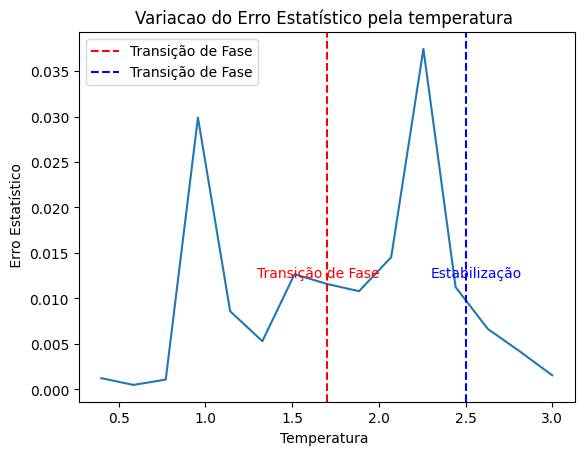

In [ ]:
sns.lineplot(x=temps, y = erroEs)
plt.title("Variacao do Erro Estatístico pela temperatura ")
plt.xlabel("Temperatura ")
plt.ylabel(" Erro Estatístico")

plt.axvline(1.7, color='red',linestyle='--', label='Transição de Fase')
plt.text(1.3, 0.012, 'Transição de Fase', color='red', fontsize=10, verticalalignment='bottom')

plt.axvline(2.5, color='blue',linestyle='--', label='Transição de Fase')
plt.text(2.3, 0.012, 'Estabilização', color='blue', fontsize=10, verticalalignment='bottom')
plt.legend()
plt.show()

Região de transição: A temperatura crítica é o ponto no qual o sistema muda de uma fase ordenada para uma fase desordenada. Nessa região, a magnetização do sistema é instável. Isso significa que é difícil estimar a magnetização do sistema com precisão. Portanto, o erro estatístico é alto.

Estabilização: A estabilização do erro estatístico ocorre quando a temperatura está suficientemente acima da temperatura crítica. Nessa região, a magnetização do sistema é baixa
 e as flutuações aleatórias são pequenas.


### Identifique possíveis fases do sistema
descrevendo as principais características das fases encontradas.

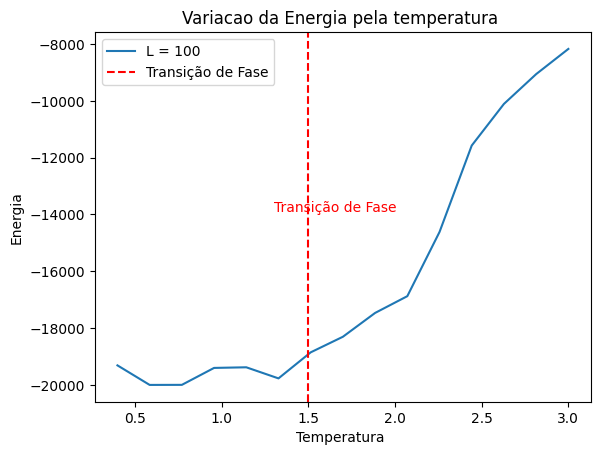

In [ ]:
sns.lineplot(x=temps, y = energy,label=f"L = {size}")
plt.title("Variacao da Energia pela temperatura ")
plt.xlabel("Temperatura ")
plt.ylabel("Energia")

plt.axvline(1.5, color='red',linestyle='--', label='Transição de Fase')
plt.text(1.3, -14000, 'Transição de Fase', color='red', fontsize=10, verticalalignment='bottom')
plt.legend()
plt.show()

O modelo de Ising apresenta duas fases principais:

Fase ordenada: Abaixo da temperatura crítica, o sistema está em uma fase ordenada, na qual os spins estão alinhados na mesma direção. Nessa fase, a magnetização do sistema é alta.

Fase desordenada: Acima da temperatura crítica, o sistema está em uma fase desordenada, na qual os spins estão orientados aleatoriamente. Nessa fase, a magnetização do sistema é baixa.